In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
data=pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [31]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
The dataset has been successfully loaded. Using .info() and .describe() 
reveals that some columns like Age, Cabin, and Embarked contain missing values. 
Dropping nulls with dropna() ensures clean data but may reduce the dataset size.

In [32]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [35]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
data.dropna(axis=0,inplace=True) #removes null values 
#if its true, it replaces in place
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [37]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Male count: 95
Female count: 88


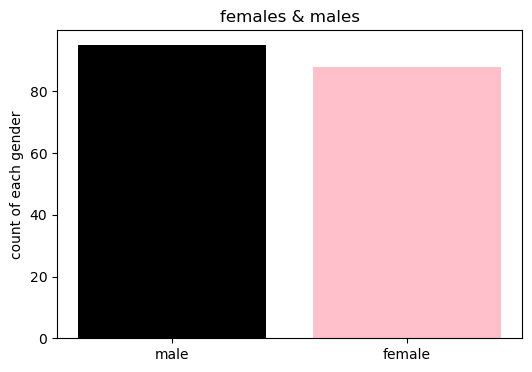

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

Male = 0
Female = 0

for val in data['Sex']:
    if val == 'male':
        Male += 1
    elif val == 'female':
        Female += 1
        
count = {'male': Male, 'female': Female}

print("Male count:", count['male'])
print("Female count:", count['female'])

# Plot
plt.figure(figsize=(6, 4))
plt.bar(count.keys(),count.values(), color=['black', 'pink'])
plt.title('females & males')
plt.ylabel('count of each gender')

plt.show()

In [ ]:
Observation:
There are more male passengers (95) than female passengers (88). 
This imbalance may influence survival rates, as gender has historically played a role in rescue priorities

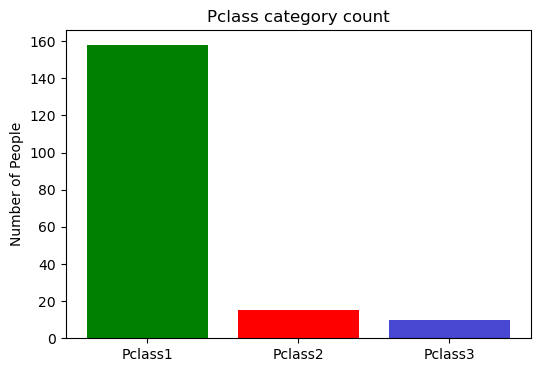

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

Pclass1=0
Pclass2=0
Pclass3=0

for val in data['Pclass']:
    if val == 1:
        Pclass1 += 1
    elif val == 2:
        Pclass2 += 1
    elif val ==3:
        Pclass3 +=1
x_labels=['Pclass1','Pclass2','Pclass3']
count=[Pclass1,Pclass2,Pclass3]
# Plot
plt.figure(figsize=(6, 4))
plt.bar(x_labels,count, color=['g', 'r','#4747d1'])
plt.title('Pclass category count')
plt.ylabel('Number of People')
plt.show()

In [ ]:
**Observation:**  
This bar chart displays the distribution of passengers across the three ticket classes (Pclass). 
The majority of passengers belong to **Pclass 1**, followed by **Pclass 2** and **Pclass 3**. 
This suggests that most travelers were from the lower economic class, which may have influenced their access to safety measures and survival outcomes.

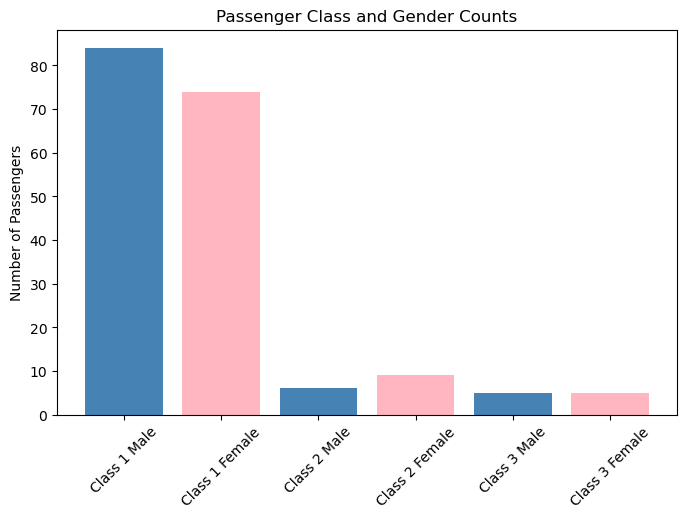

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

p1_male = 0
p1_female = 0
p2_male = 0
p2_female = 0
p3_male = 0
p3_female = 0

# Loop through rows and apply conditions
for i in range(len(data)):
    sex = data.iloc[i]['Sex']
    pclass = data.iloc[i]['Pclass']
    
    if pclass == 1 and sex == 'male':
        p1_male += 1
    elif pclass == 1 and sex == 'female':
        p1_female += 1
    elif pclass == 2 and sex == 'male':
        p2_male += 1
    elif pclass == 2 and sex == 'female':
        p2_female += 1
    elif pclass == 3 and sex == 'male':
        p3_male += 1
    elif pclass == 3 and sex == 'female':
        p3_female += 1

labels = ['Class 1 Male', 'Class 1 Female',
          'Class 2 Male', 'Class 2 Female',
          'Class 3 Male', 'Class 3 Female']
counts = [p1_male, p1_female, p2_male, p2_female, p3_male, p3_female]

plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color=['steelblue', 'lightpink']*3)
plt.title('Passenger Class and Gender Counts')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.show()

In [ ]:
**Observation:**  
This bar chart illustrates the distribution of passengers by both class and gender. 
The highest number of passengers are males in Class 1, followed by females in Class 1. 
Class 3 has fewer passengers overall, but a relatively balanced gender split. 

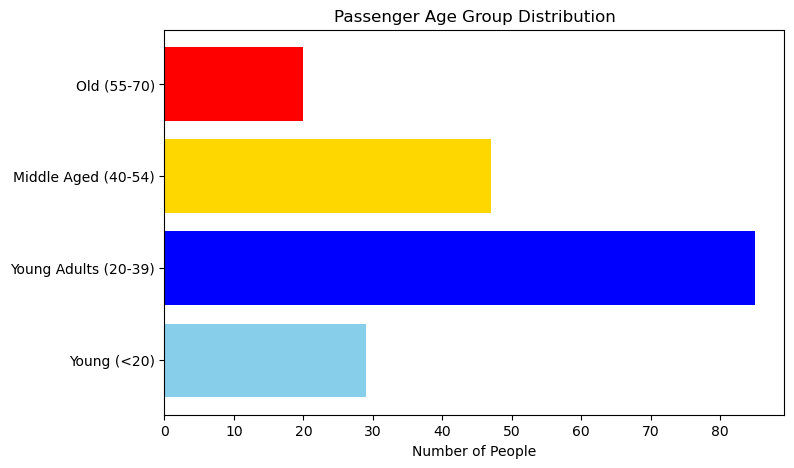

In [41]:
young = 0
young_adults = 0
middle_aged = 0
old = 0

# Loop through age values with conditions
for age in data['Age']:
    if pd.isnull(age):  # Skip missing ages
        continue
    elif age < 20:
        young += 1
    elif 20 <= age < 40:
        young_adults += 1
    elif 40 <= age < 55:
        middle_aged += 1
    elif 55 <= age <= 70:
        old += 1

# Prepare data for plotting
labels = ['Young (<20)', 'Young Adults (20-39)', 'Middle Aged (40-54)', 'Old (55-70)']
counts = [young, young_adults, middle_aged, old]

# Plot horizontal bar graph
plt.figure(figsize=(8, 5))
plt.barh(labels, counts, color=['skyblue', 'blue', 'gold', 'red'])
plt.title('Passenger Age Group Distribution')
plt.xlabel('Number of People')
plt.show()

In [ ]:
**Observation:**  
This horizontal bar chart shows the distribution of passengers across different age groups. 
The largest group is **young adults (20–39 years)**, followed by **middle-aged passengers (40–54 years)**. 
Very few passengers are under 20 or over 55. This age distribution suggests that the majority of travelers
were in their prime working years, which may influence survival patterns and decision-making during the disaster.

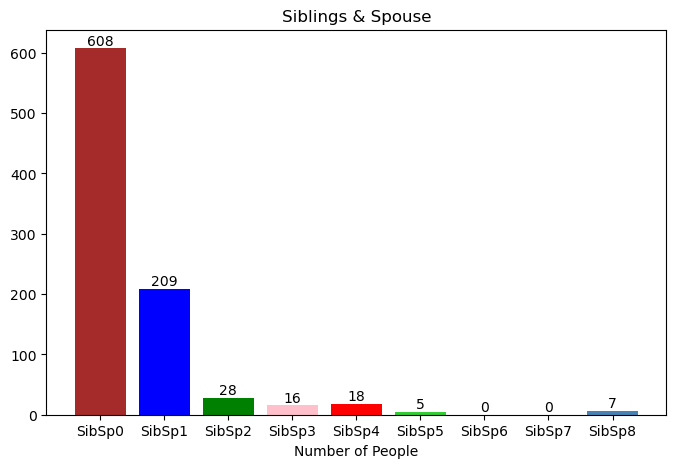

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('train.csv')

sibsp0=sibsp1=sibsp2=sibsp3=sibsp4=sibsp5=sibsp6=sibsp7=sibsp8=0
for val in data['SibSp']:
    if val == 0:
        sibsp0 += 1
    elif val == 1:
        sibsp1 += 1
    elif val ==2:
        sibsp2 +=1
    elif val == 3:
        sibsp3 += 1
    elif val ==4:
        sibsp4 +=1
    elif val == 5:
        sibsp5 += 1
    elif val ==6:
        sibsp6 +=1
    elif val == 7:
        sibsp7 += 1
    elif val ==8:
        sibsp8 +=1
        
x_labels=['SibSp0','SibSp1','SibSp2','SibSp3','SibSp4','SibSp5','SibSp6','SibSp7','SibSp8']
count=[sibsp0,sibsp1,sibsp2,sibsp3,sibsp4,sibsp5,sibsp6,sibsp7,sibsp8]

plt.figure(figsize=(8, 5))
bars=plt.bar(x_labels, count, color=['brown', 'b', 'g', 'pink','red','limegreen','black','gold','steelblue'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Siblings & Spouse')
plt.xlabel('Number of People')
plt.show()

In [ ]:
**Observation:**  
This bar chart shows the number of passengers based on how many siblings or spouses (`SibSp`) they had aboard.
The majority of passengers traveled alone (`SibSp = 0`), followed by those with one companion.
Very few passengers had more than two family members with them. This suggests that most travelers were either solo
or in small family units, which may have influenced their ability to survive or receive help during the evacuation.

In [44]:
data=pd.read_csv('train.csv')

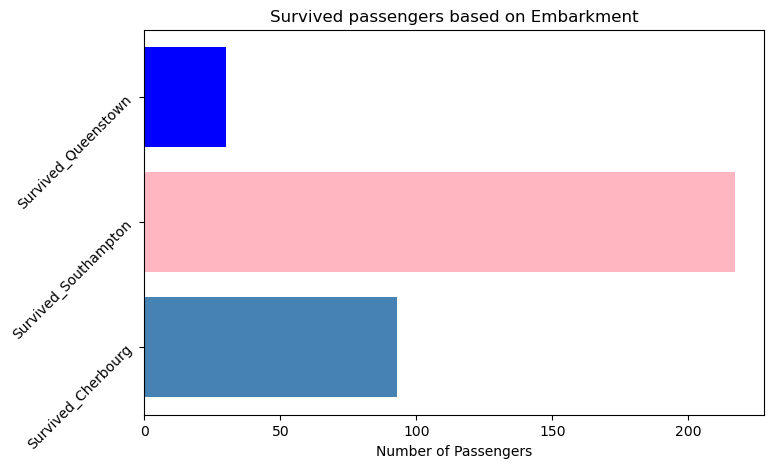

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

survived_C= 0
survived_S = 0
survived_Q = 0

# Loop through rows and apply conditions
for i in range(len(data)):
    survived = data.iloc[i]['Survived']
    embarked = data.iloc[i]['Embarked']
    
    if survived == 1 and embarked == 'C':
        survived_C += 1
    elif survived == 1 and embarked == 'S':
        survived_S += 1
    elif survived == 1 and embarked == 'Q':
        survived_Q += 1
        

labels = ['Survived_Cherbourg', 'Survived_Southampton', 'Survived_Queenstown']
counts = [survived_C,survived_S,survived_Q]

plt.figure(figsize=(8, 5))
bars=plt.barh(labels, counts,color=['steelblue','lightpink','blue'])

plt.title('Survived passengers based on Embarkment')
plt.xlabel('Number of Passengers')
plt.yticks(rotation=45)
plt.show()

In [ ]:
**Observation:**  
This horizontal bar chart shows the number of passengers who survived based on their embarkment location. 
The highest number of survivors boarded from **Southampton**, followed by **Cherbourg** and **Queenstown**.
This may reflect differences in passenger demographics, cabin locations, or access to lifeboats depending on where passengers boarded the ship.

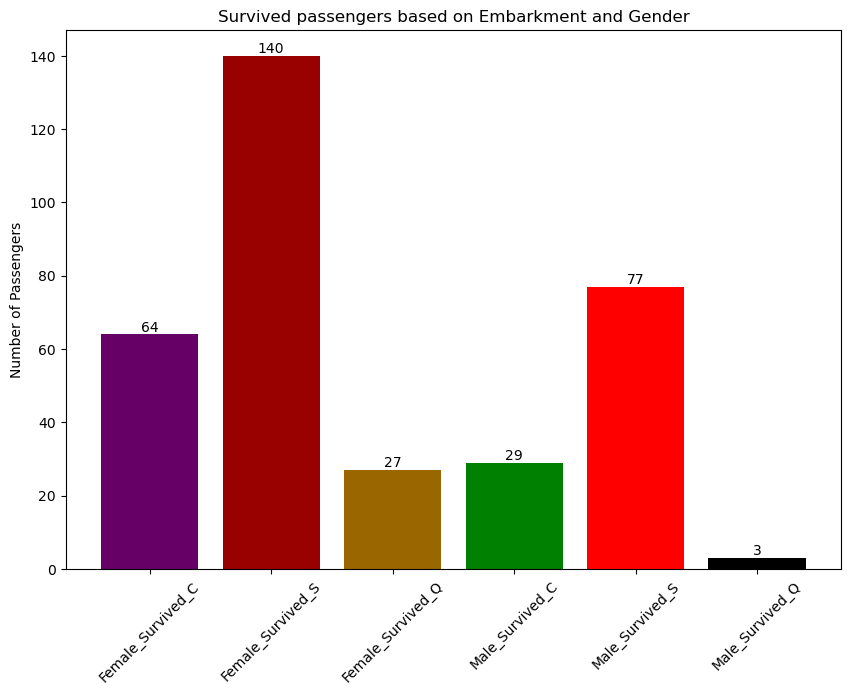

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

female_survived_C= female_survived_S = female_survived_Q = 0
male_survived_C= male_survived_S = male_survived_Q = 0

# Loop through rows and apply conditions
for i in range(len(data)):
    survived = data.iloc[i]['Survived']
    gender= data.iloc[i]['Sex']
    embarked = data.iloc[i]['Embarked']
    
    if gender== 'female' and survived == 1 and embarked == 'C':
        female_survived_C += 1
    elif gender== 'female' and survived == 1 and embarked == 'S':
        female_survived_S += 1
    elif gender== 'female' and survived == 1 and embarked == 'Q':
        female_survived_Q += 1
    elif gender== 'male' and survived == 1 and embarked == 'C':
        male_survived_C += 1
    elif gender== 'male' and survived == 1 and embarked == 'S':
        male_survived_S += 1
    elif gender== 'male' and survived == 1 and embarked == 'Q':
        male_survived_Q += 1
        

labels = ['Female_Survived_C', 'Female_Survived_S', 'Female_Survived_Q',
        'Male_Survived_C', 'Male_Survived_S', 'Male_Survived_Q']
counts = [female_survived_C,female_survived_S,female_survived_Q,male_survived_C,male_survived_S,male_survived_Q]

plt.figure(figsize=(10, 7))
bars=plt.bar(labels, counts,color=['#660066','#990000','#996600','g','r','black'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Survived passengers based on Embarkment and Gender')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.show()

In [ ]:
**Observation:**  
This bar chart breaks down the number of survivors by both gender and embarkment location. 
Among females, the highest survival count is from **Southampton**, followed by **Cherbourg** and **Queenstown**. 
For males, **Southampton** also leads, but with noticeably lower survival counts compared to females. 
This suggests that both **gender** and **embarkment point** played a role in survival outcomes, possibly 
due to differences in cabin location, travel class, or rescue priority.

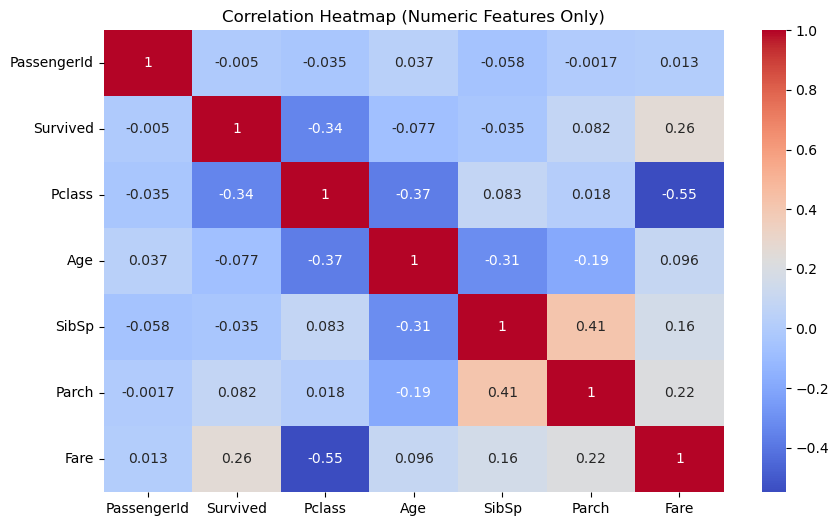

In [49]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

In [ ]:
**Observation:**  
This correlation heatmap reveals relationships between numeric features in the dataset.
Notably, **Fare** shows a moderate positive correlation with **Survived**, suggesting that passengers who paid higher fares 
had better survival chances—likely due to being in higher classes. **Pclass** has a negative correlation with **Survived**, 
reinforcing that lower-class passengers faced greater risk. Other features like **Age**, **SibSp**, and **Parch** 
show weaker correlations, indicating limited direct influence on survival when considered individually.

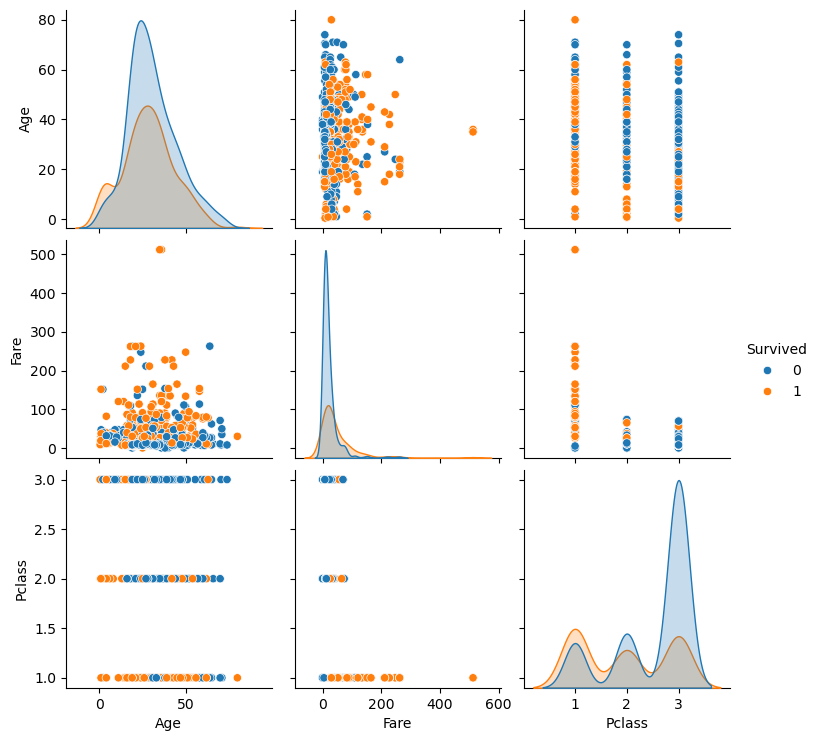

In [48]:
sns.pairplot(data[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.show()

In [ ]:
**Observation:**  
This pairplot visualizes relationships between multiple numerical features—**Age**, **Fare**, and **Pclass**—with respect to **Survival**.
Clear separation is visible in the **Fare vs Pclass** plot, where higher fares are associated with lower class numbers 
(i.e., higher socioeconomic status). Survivors tend to cluster in areas with **higher fares** and **lower Pclass values**, 
indicating that wealthier passengers had better survival chances. The **Age** distribution shows more overlap, suggesting 
it was a less decisive factor on its own.

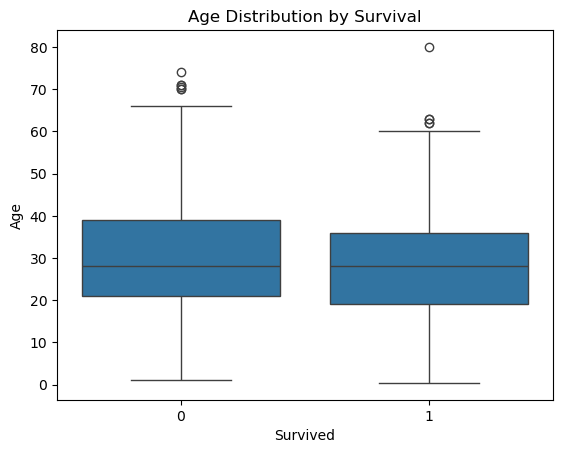

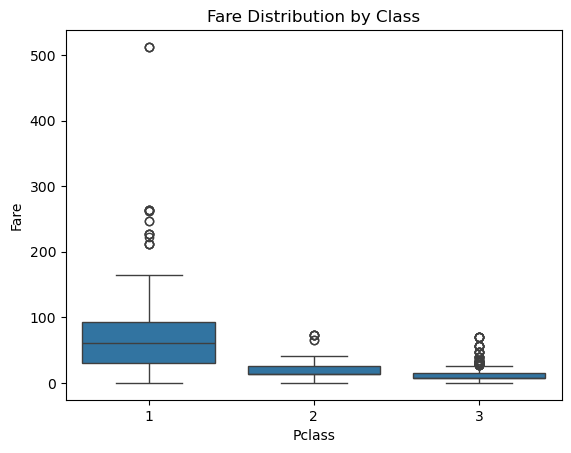

In [50]:
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Age Distribution by Survival')
plt.show()

sns.boxplot(x='Pclass', y='Fare', data=data)
plt.title('Fare Distribution by Class')
plt.show()


In [ ]:
**Observation:**  
The first boxplot shows the distribution of **Age** across survival status. 
Survivors tend to be slightly younger on average, but the age ranges overlap significantly,
indicating that age alone was not a strong predictor of survival.

The second boxplot reveals a clear pattern: passengers in **Pclass 1** paid significantly higher fares
compared to those in **Pclass 2** and **Pclass 3**. This confirms the socioeconomic divide among passengers, 
which likely influenced access to safety resources and survival chances.

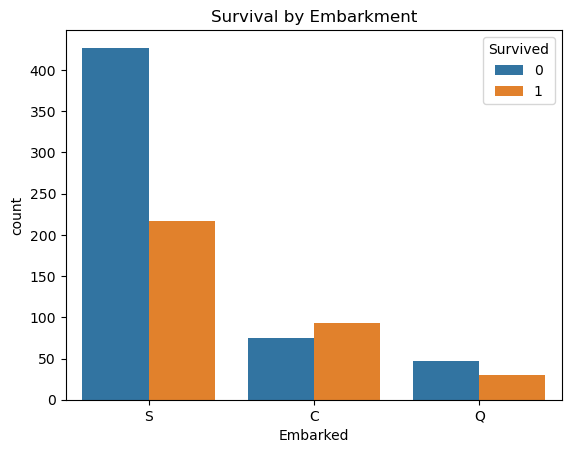

In [51]:
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title('Survival by Embarkment')
plt.show()


In [ ]:
**Observation:**  
This countplot shows the number of passengers who survived and did not survive based on their embarkment location. 
Passengers who boarded from **Southampton (S)** had the highest overall count, but also the highest number of non-survivors. 
In contrast, **Cherbourg (C)** had a relatively higher proportion of survivors. 
This suggests that embarkment location may be associated with survival likelihood, possibly due to differences in passenger class or cabin location.